# RNN

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Get all csv files in directory

In [2]:
rnn_files = [f for f in os.listdir() if f. endswith('.csv')]

Dictionary to store the data from the csv files

In [3]:
dfs = {}

For each csv, load into a df

In [4]:
for r in rnn_files:
    df_name = os.path.splitext(r)[0]
    dfs[df_name] = pd.read_csv(r)

Define epochs and batch sizes

In [5]:
epochs_list = [25,50,100]
batch_sizes = [32,64,128]

Dictionary for results

In [6]:
results = {}

Test dates and standardized_y_test

In [7]:
actual_test_dates = None
actual_standardized_y_test = None

## Actual RNN Loop

In [ ]:
for epochs in epochs_list:
    for batch_size in batch_sizes:
        print(f"\nTraining model with epochs={epochs}, batch_size={batch_size}\n")
        results[(epochs, batch_size)] = {}

        for i, (name, df) in enumerate(dfs.items()):
            print(f"Processing dataframe {i+1} with epochs={epochs}, batch_size={batch_size}")

            train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)
            test_dates = pd.to_datetime(test_df['date'])

            X_train = train_df.iloc[:, 1:-1].values
            y_train = train_df['new_cases'].values

            X_test = test_df.iloc[:, 1:-1].values
            y_test = test_df['new_cases'].values

            X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

            model = Sequential()
            model.add(LSTM(256, activation='relu', input_shape=(X_train.shape[1], 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mse')

            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

            predictions = model.predict(X_test)

            results[(epochs, batch_size)][name] = {
                'predictions': predictions,
                'actual_y_test': y_test,
                'test_dates': test_dates
            }


Training model with epochs=25, batch_size=32

Processing dataframe 1 with epochs=25, batch_size=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing dataframe 2 with epochs=25, batch_size=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing dataframe 3 with epochs=25, batch_size=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x16a445480> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Training model with epochs=25, batch_size=64

Processing dataframe 1 with epochs=25, batch_size=64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing dataframe 2 with epochs=25, batch_size=64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Processing dataframe 3 with epochs=25, batch_size=64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Training model with epochs=25, batch_size=128

Processing dataframe 1 with epochs=25, batch_size=128


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Processing dataframe 2 with epochs=25, batch_size=128


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing dataframe 3 with epochs=25, batch_size=128


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Training model with epochs=50, batch_size=32

Processing dataframe 1 with epochs=50, batch_size=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing dataframe 2 with epochs=50, batch_size=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Processing dataframe 3 with epochs=50, batch_size=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Training model with epochs=50, batch_size=64

Processing dataframe 1 with epochs=50, batch_size=64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Processing dataframe 2 with epochs=50, batch_size=64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Processing dataframe 3 with epochs=50, batch_size=64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Training model with epochs=50, batch_size=128

Processing dataframe 1 with epochs=50, batch_size=128


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Processing dataframe 2 with epochs=50, batch_size=128


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Processing dataframe 3 with epochs=50, batch_size=128


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Training model with epochs=100, batch_size=32

Processing dataframe 1 with epochs=100, batch_size=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Processing dataframe 2 with epochs=100, batch_size=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Processing dataframe 3 with epochs=100, batch_size=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Training model with epochs=100, batch_size=64

Processing dataframe 1 with epochs=100, batch_size=64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Processing dataframe 2 with epochs=100, batch_size=64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Processing dataframe 3 with epochs=100, batch_size=64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Training model with epochs=100, batch_size=128

Processing dataframe 1 with epochs=100, batch_size=128


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Processing dataframe 2 with epochs=100, batch_size=128


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Processing dataframe 3 with epochs=100, batch_size=128


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [9]:
for item in os.listdir('./model_results'):
    item_path = os.path.join('./model_results', item)
    if os.path.isfile(item_path) or os.path.islink(item_path):
        os.unlink(item_path)
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

## Outputing Results in a csv

In [10]:
output_dir = "model_results"
os.makedirs(output_dir, exist_ok=True)

In [11]:
for (epochs, batch_size), dataset_results in results.items():
    for dataset_name, data in dataset_results.items():

        df_out = pd.DataFrame({
            'date': data['test_dates'],
            'actual_y_test': data['actual_y_test'],
            'predictions': data['predictions'].flatten()
        })

        filename = f"{dataset_name}_epochs{epochs}_batch{batch_size}.csv"
        filepath = os.path.join(output_dir, filename)

        df_out.to_csv(filepath, index=False)
        print(f"Saved: {filepath}")

Saved: model_results/topic3_epochs25_batch32.csv
Saved: model_results/topic2_epochs25_batch32.csv
Saved: model_results/topic1_epochs25_batch32.csv
Saved: model_results/topic3_epochs25_batch64.csv
Saved: model_results/topic2_epochs25_batch64.csv
Saved: model_results/topic1_epochs25_batch64.csv
Saved: model_results/topic3_epochs25_batch128.csv
Saved: model_results/topic2_epochs25_batch128.csv
Saved: model_results/topic1_epochs25_batch128.csv
Saved: model_results/topic3_epochs50_batch32.csv
Saved: model_results/topic2_epochs50_batch32.csv
Saved: model_results/topic1_epochs50_batch32.csv
Saved: model_results/topic3_epochs50_batch64.csv
Saved: model_results/topic2_epochs50_batch64.csv
Saved: model_results/topic1_epochs50_batch64.csv
Saved: model_results/topic3_epochs50_batch128.csv
Saved: model_results/topic2_epochs50_batch128.csv
Saved: model_results/topic1_epochs50_batch128.csv
Saved: model_results/topic3_epochs100_batch32.csv
Saved: model_results/topic2_epochs100_batch32.csv
Saved: model

In [12]:
model_files = [f for f in os.listdir('./model_results') if f. endswith('.csv')]

In [13]:
model_dfs = {}

In [14]:
for m in model_files:
    df_n = os.path.splitext(m)[0]
    file_path = os.path.join('./model_results', m)
    model_dfs[df_n] = pd.read_csv(file_path)

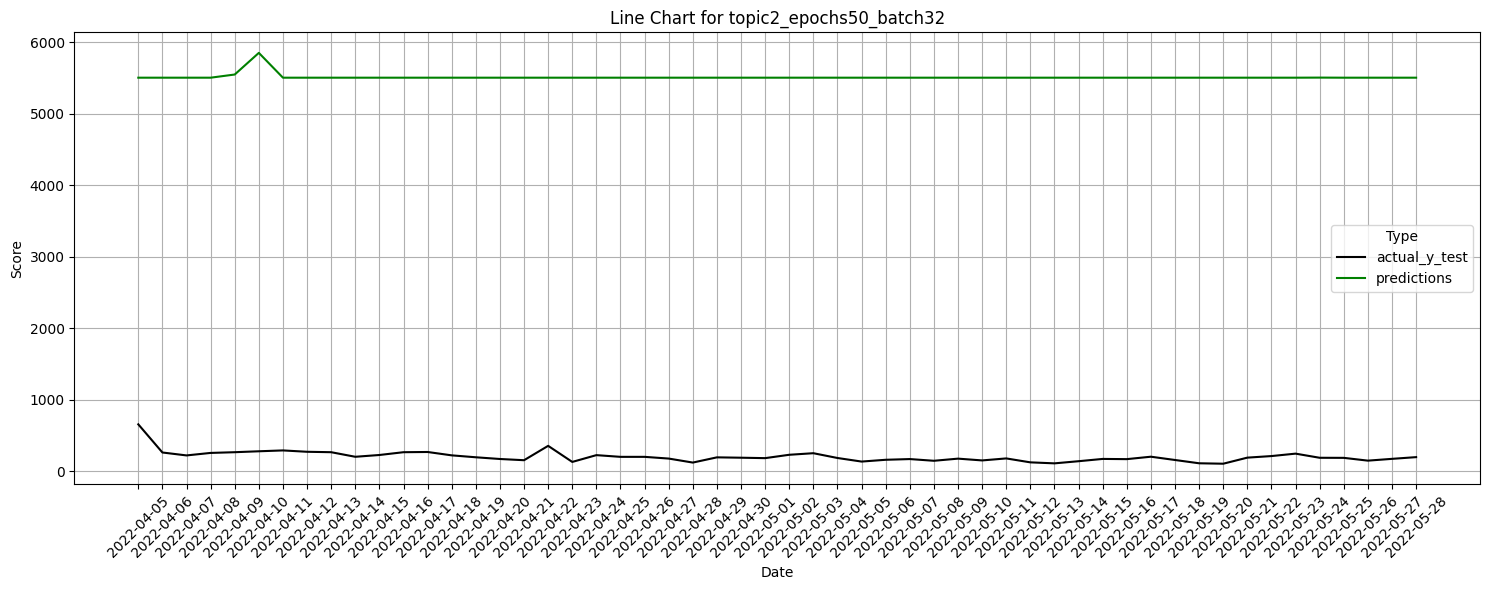

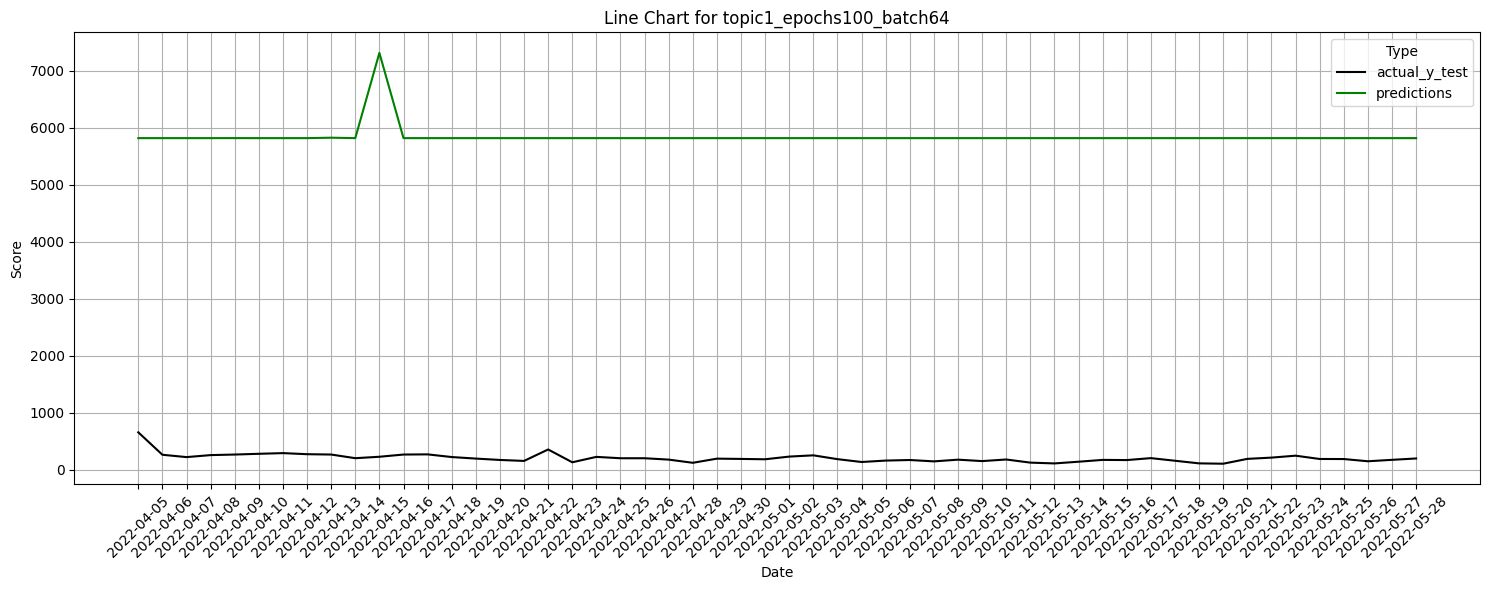

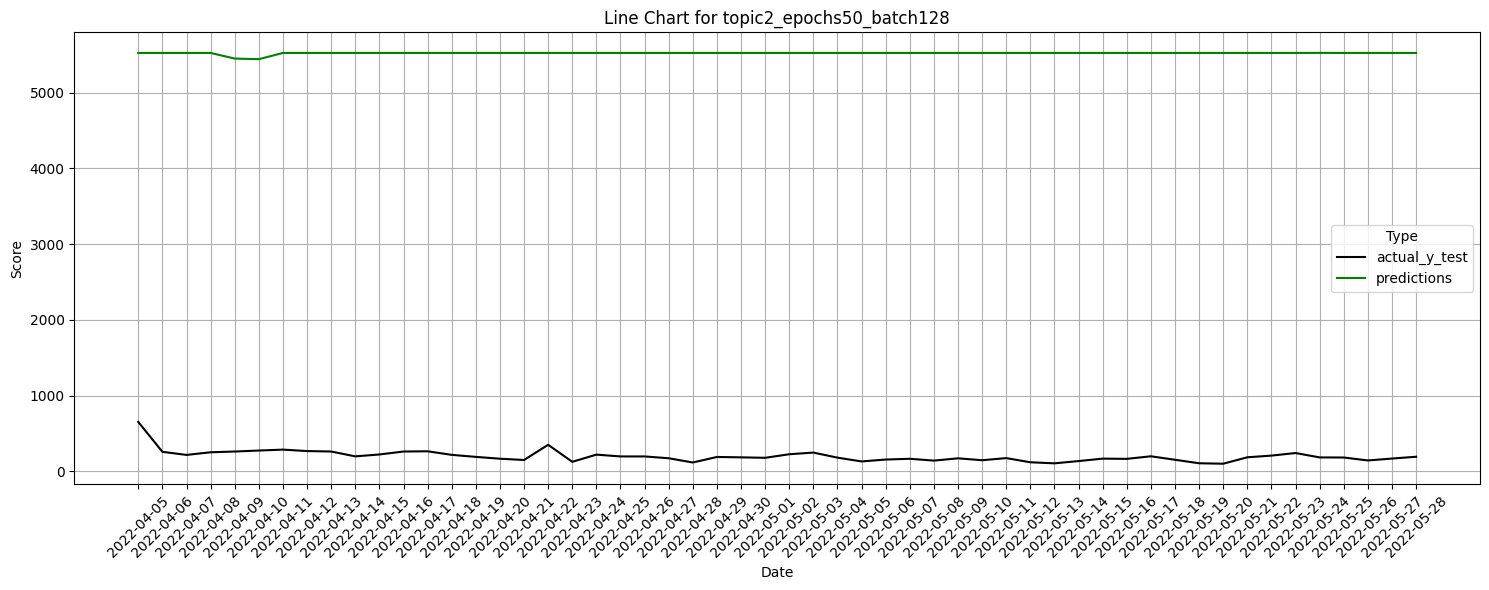

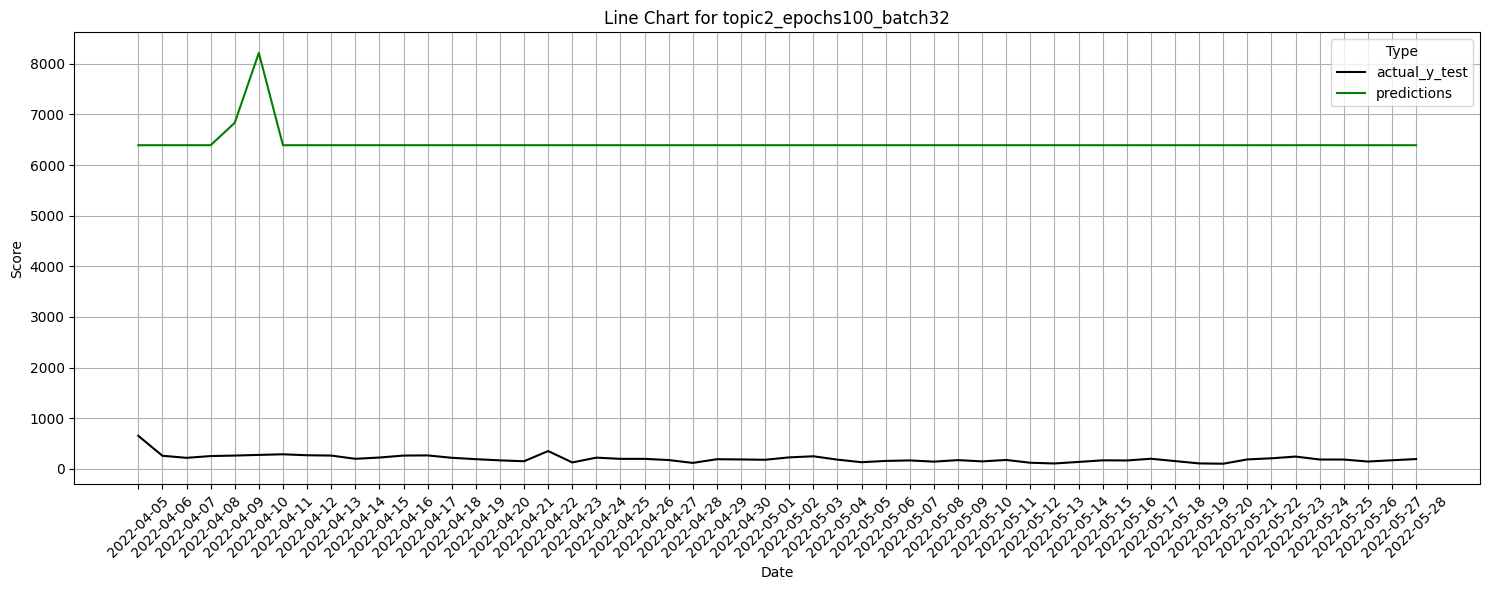

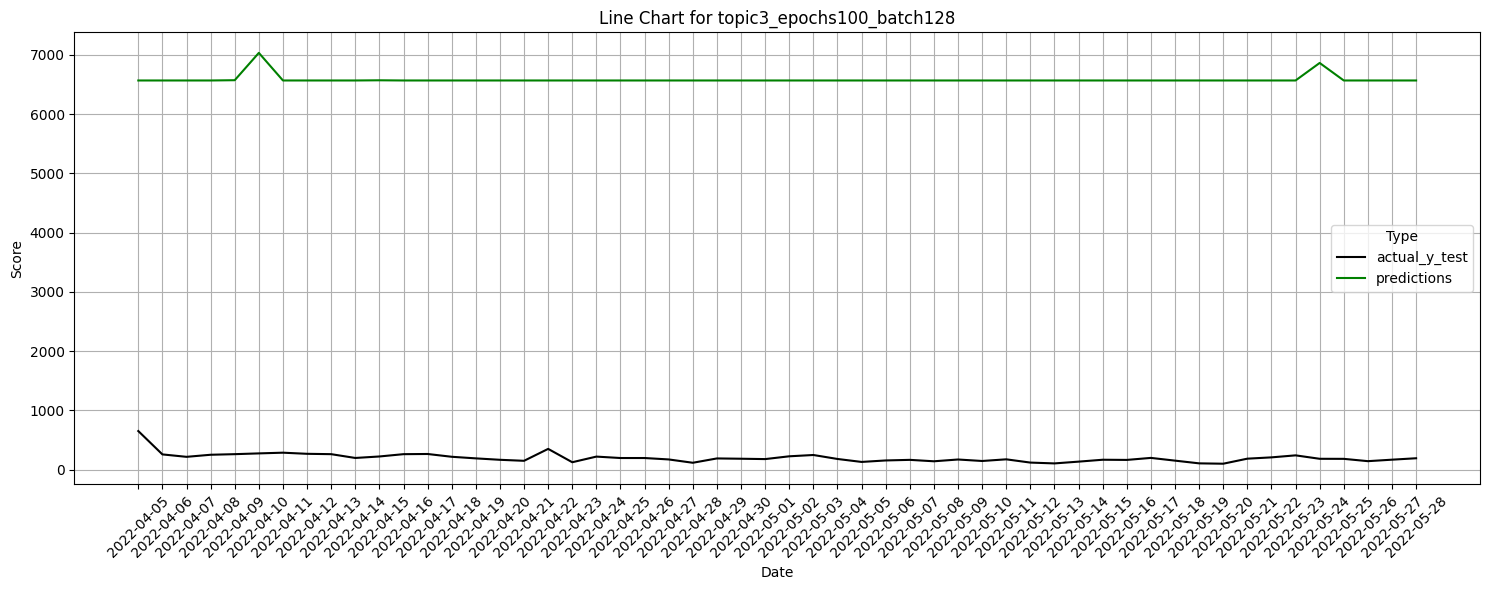

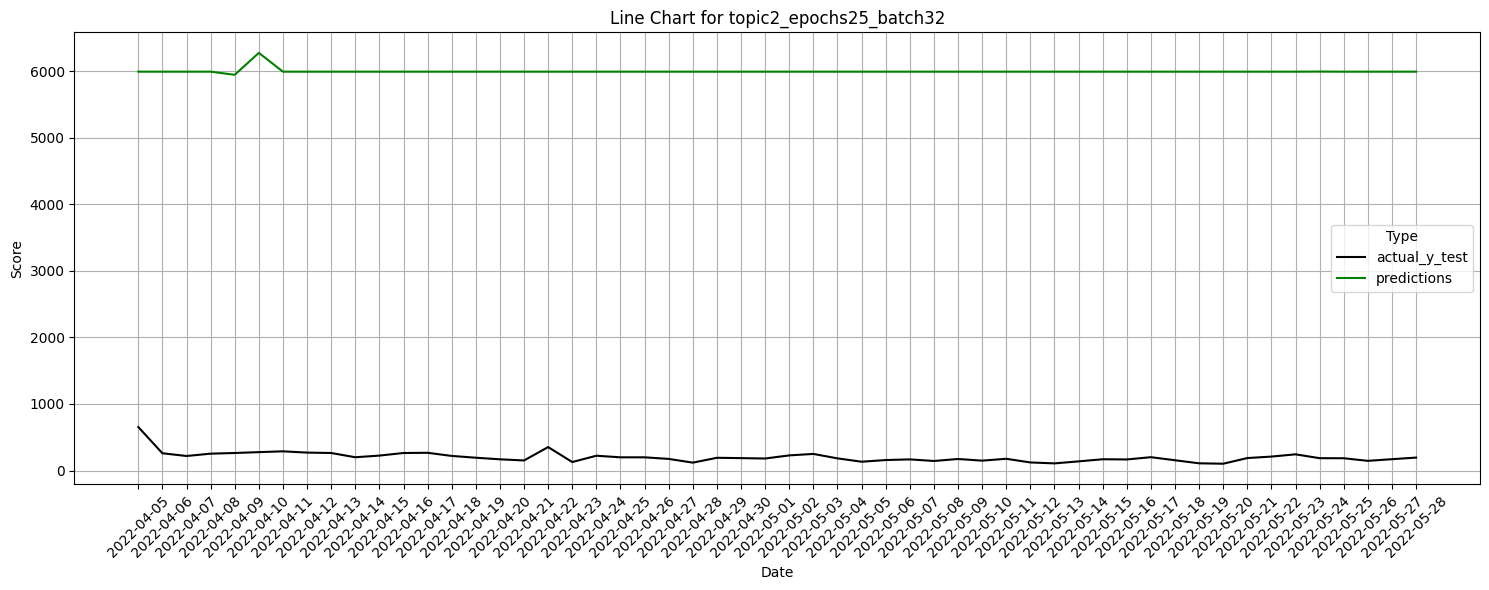

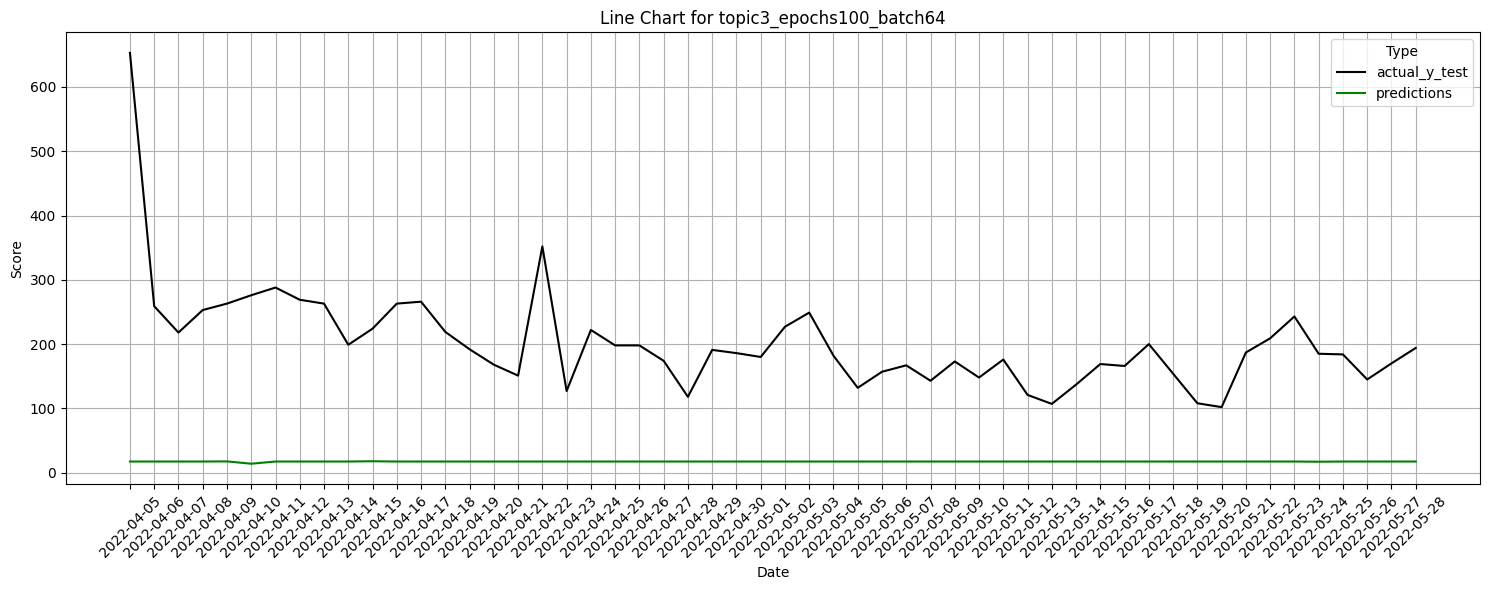

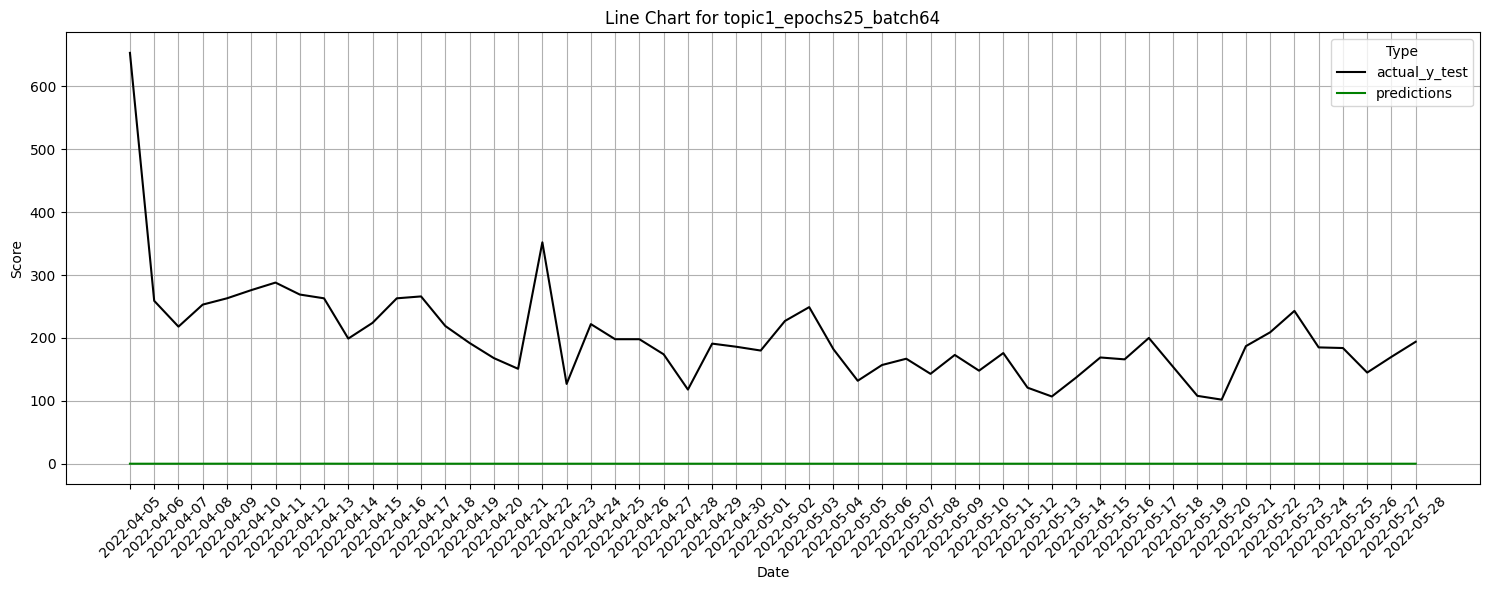

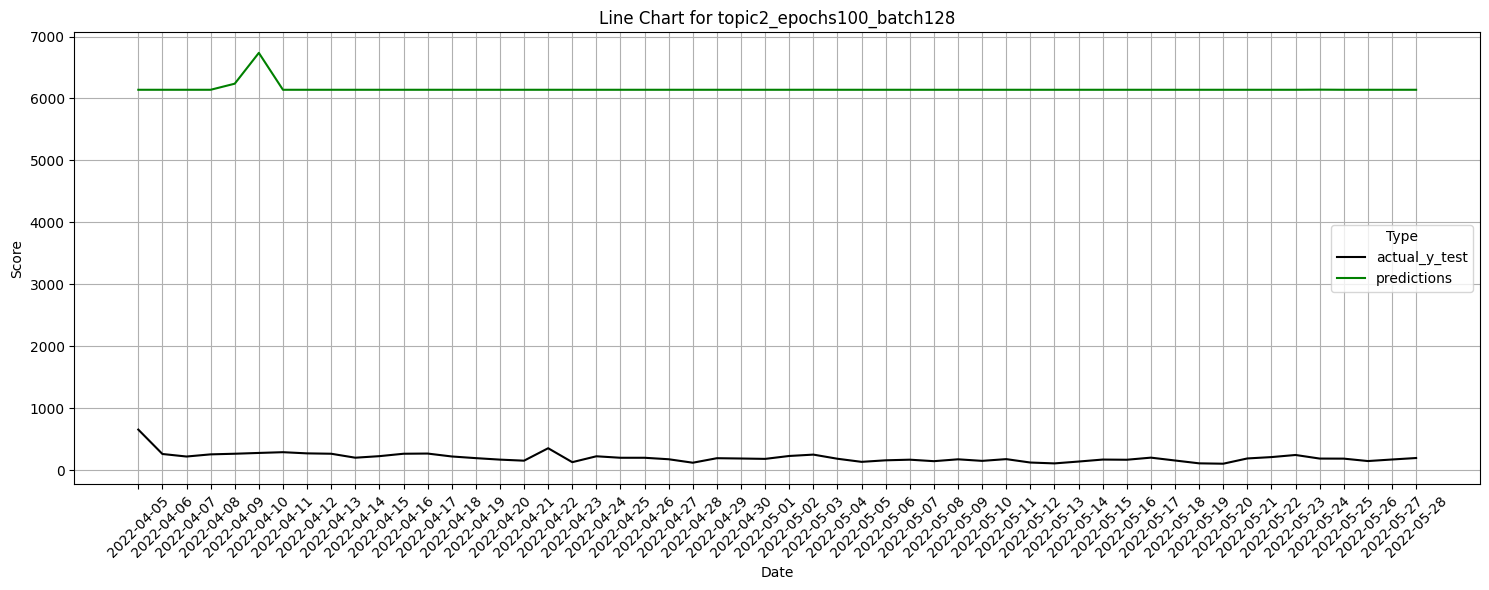

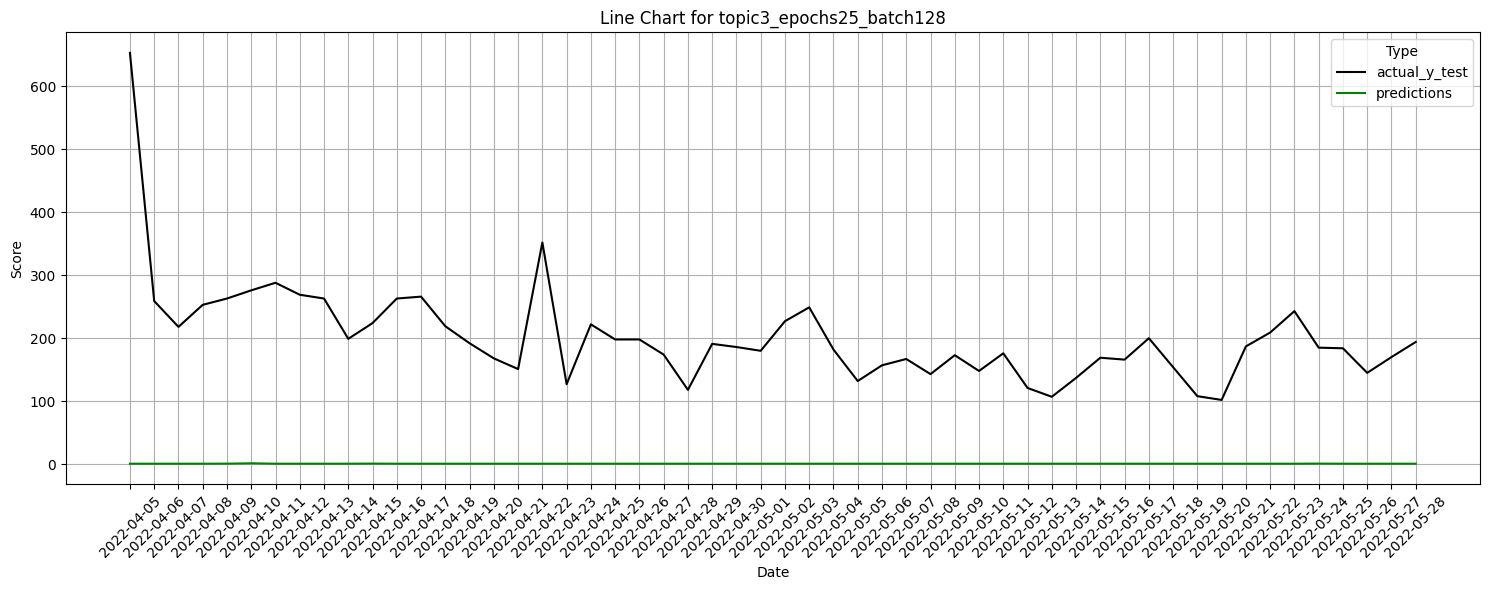

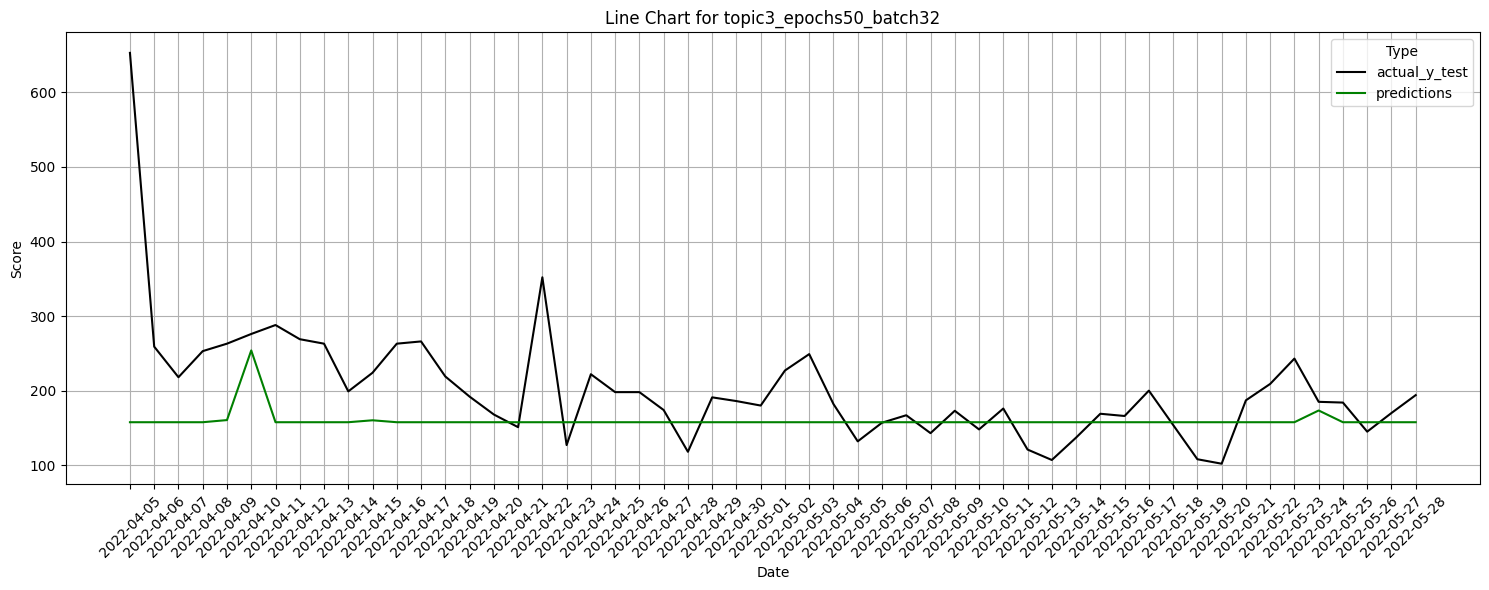

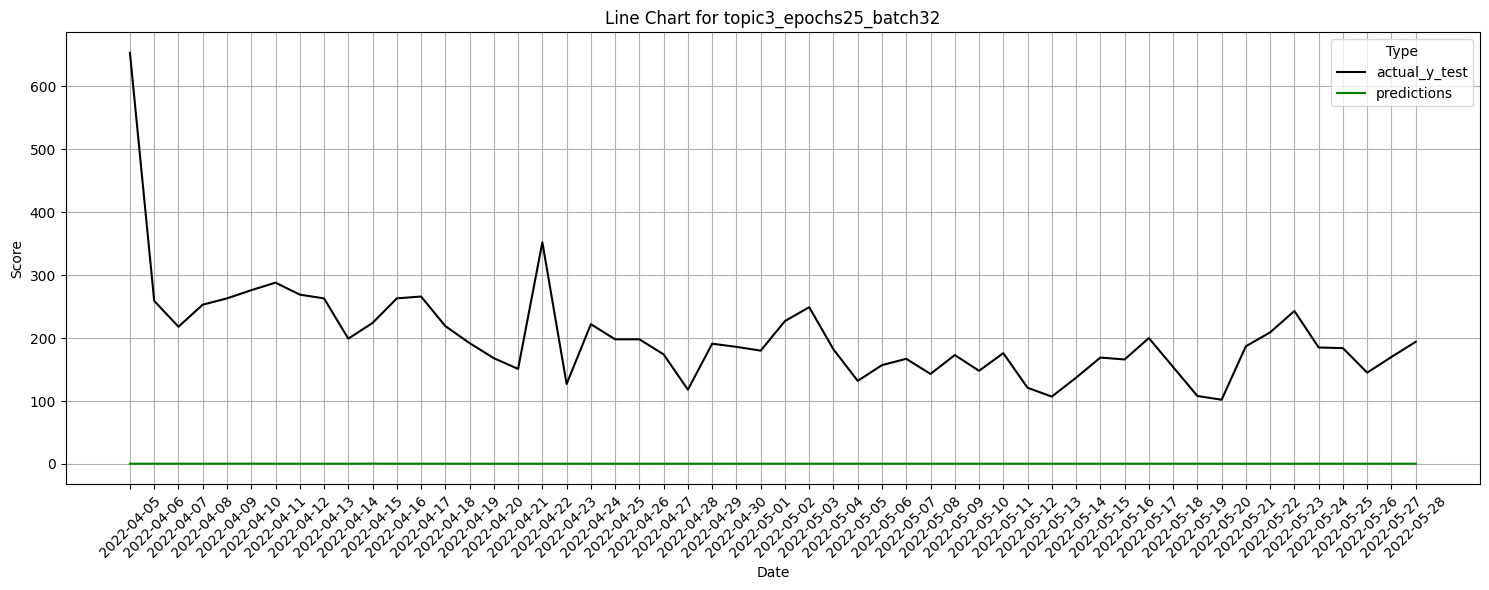

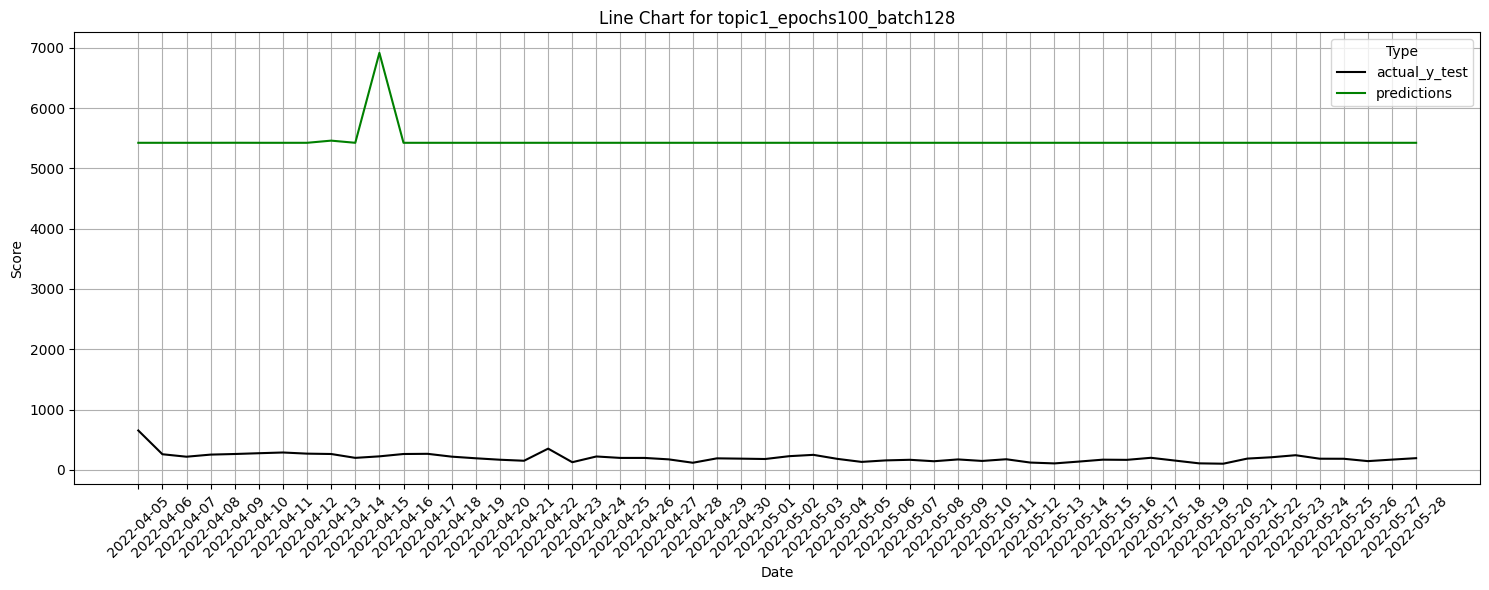

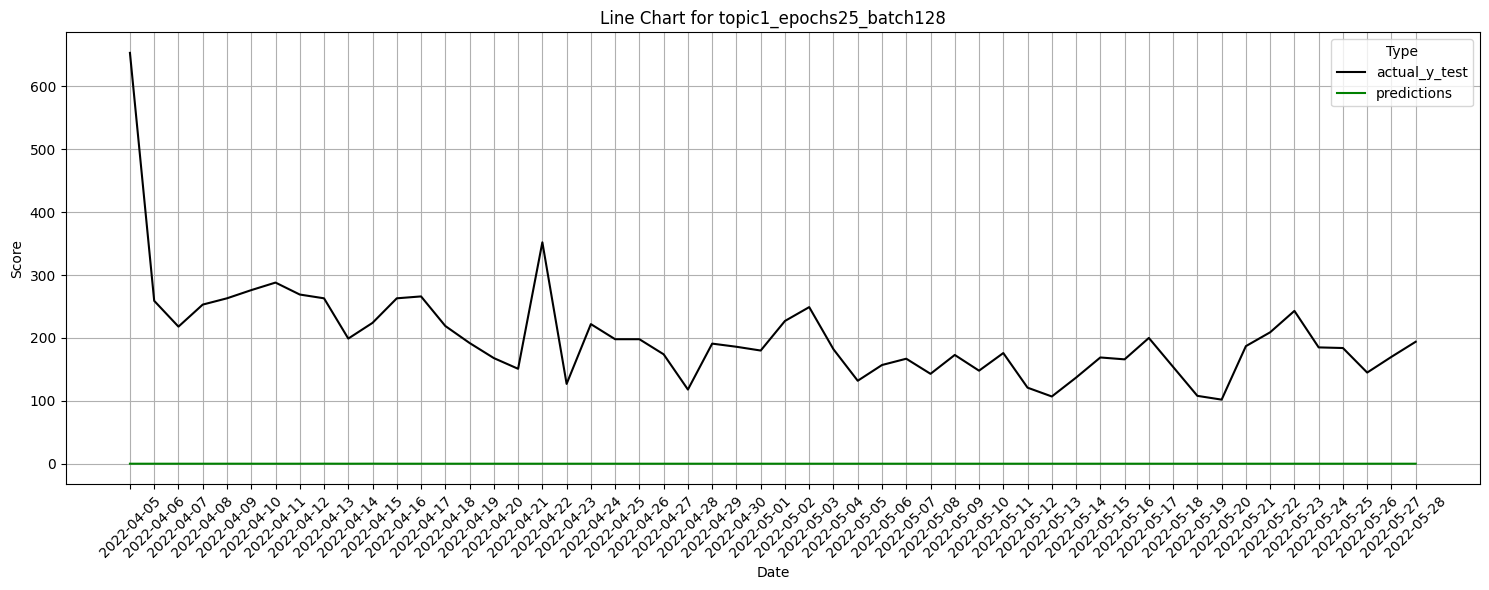

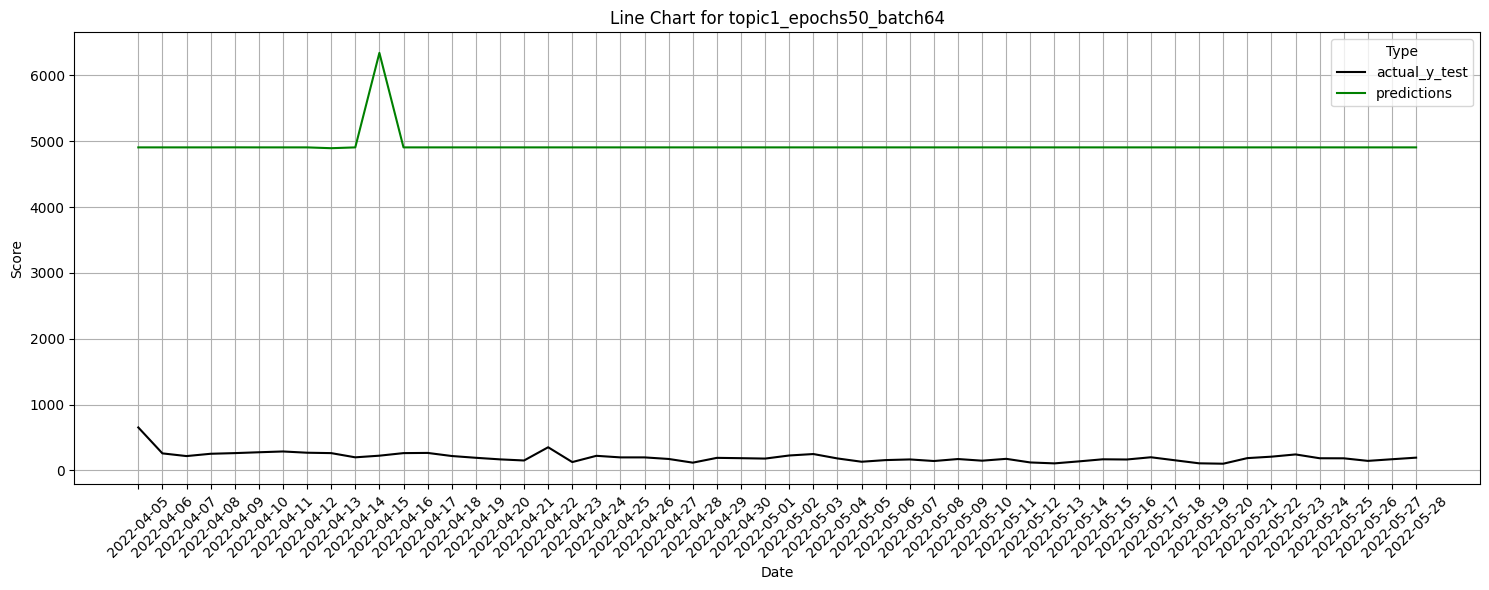

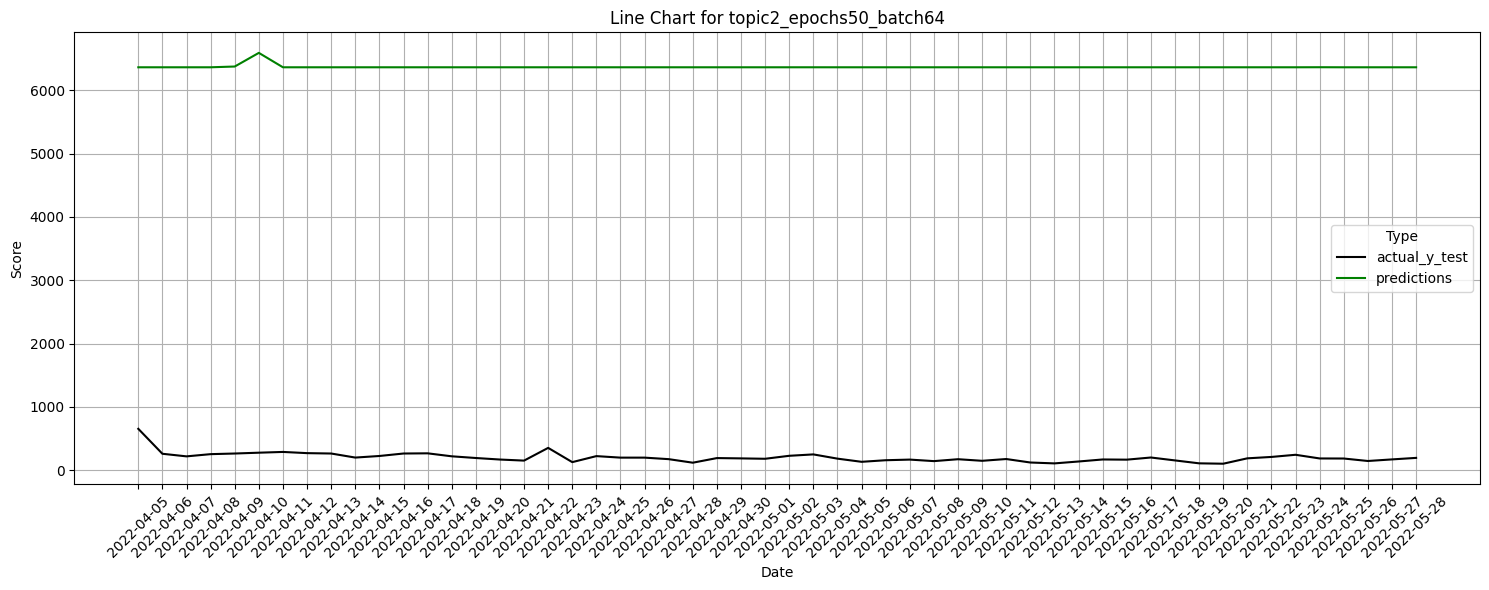

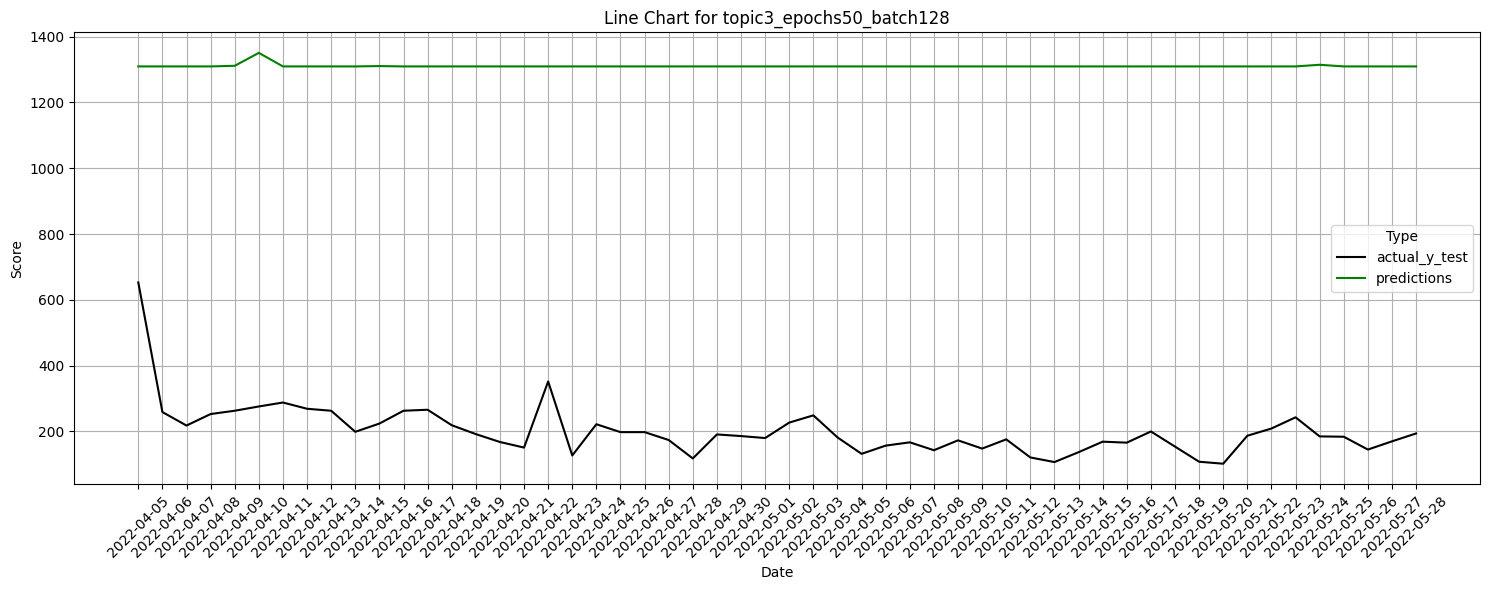

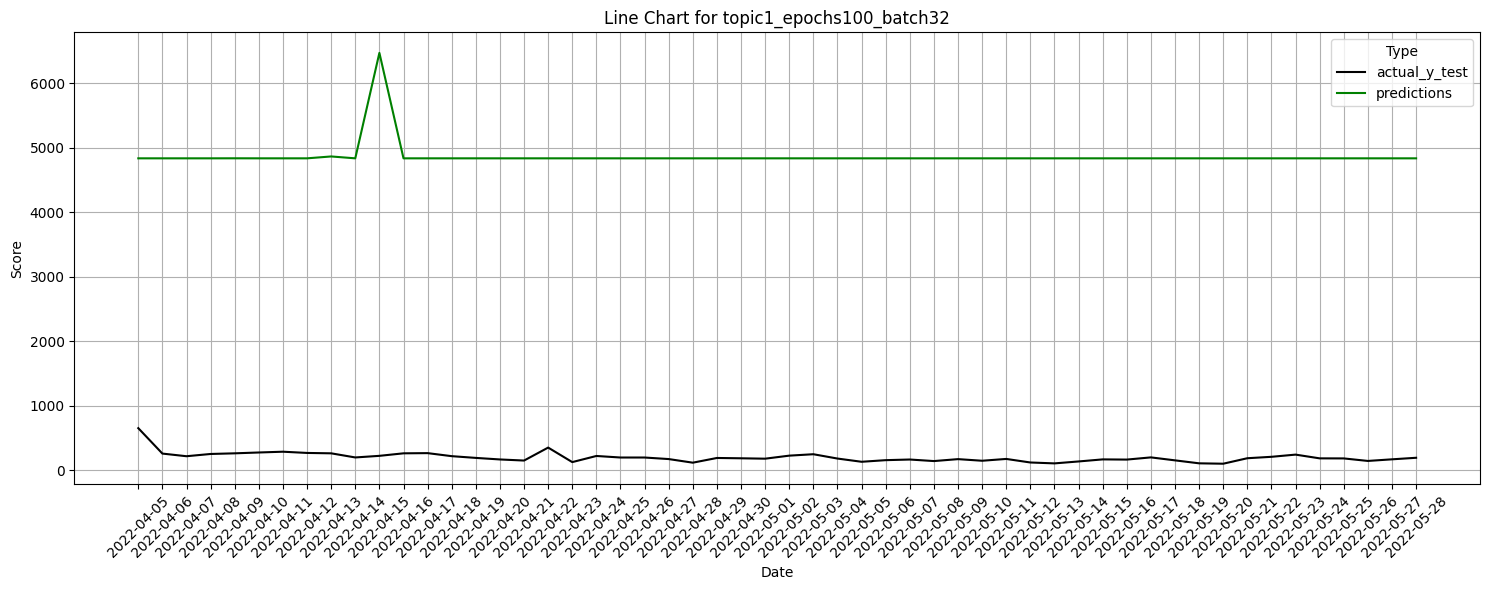

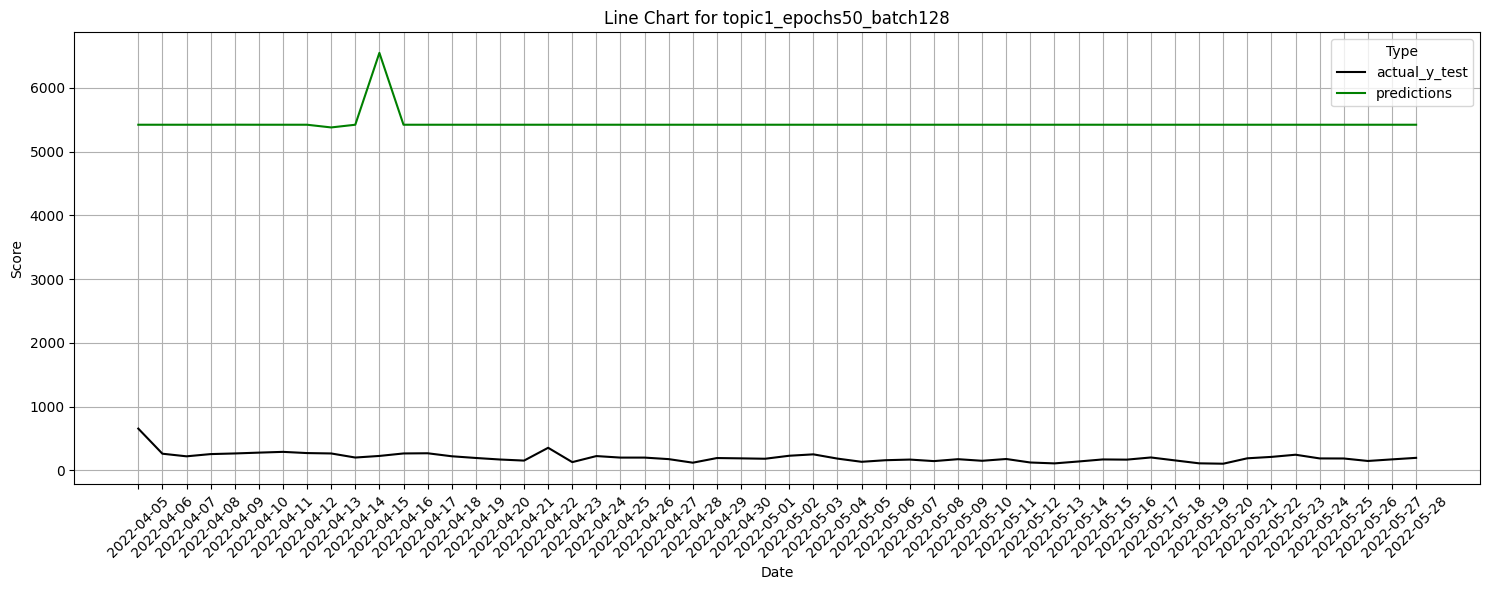

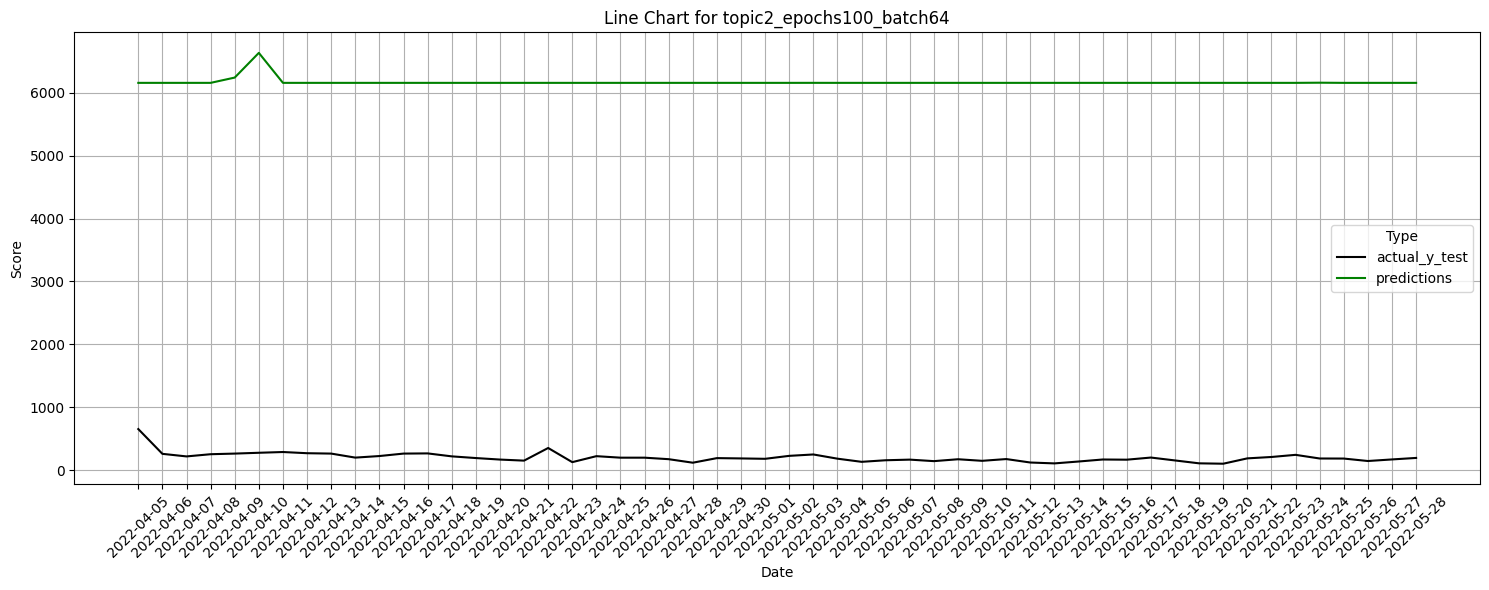

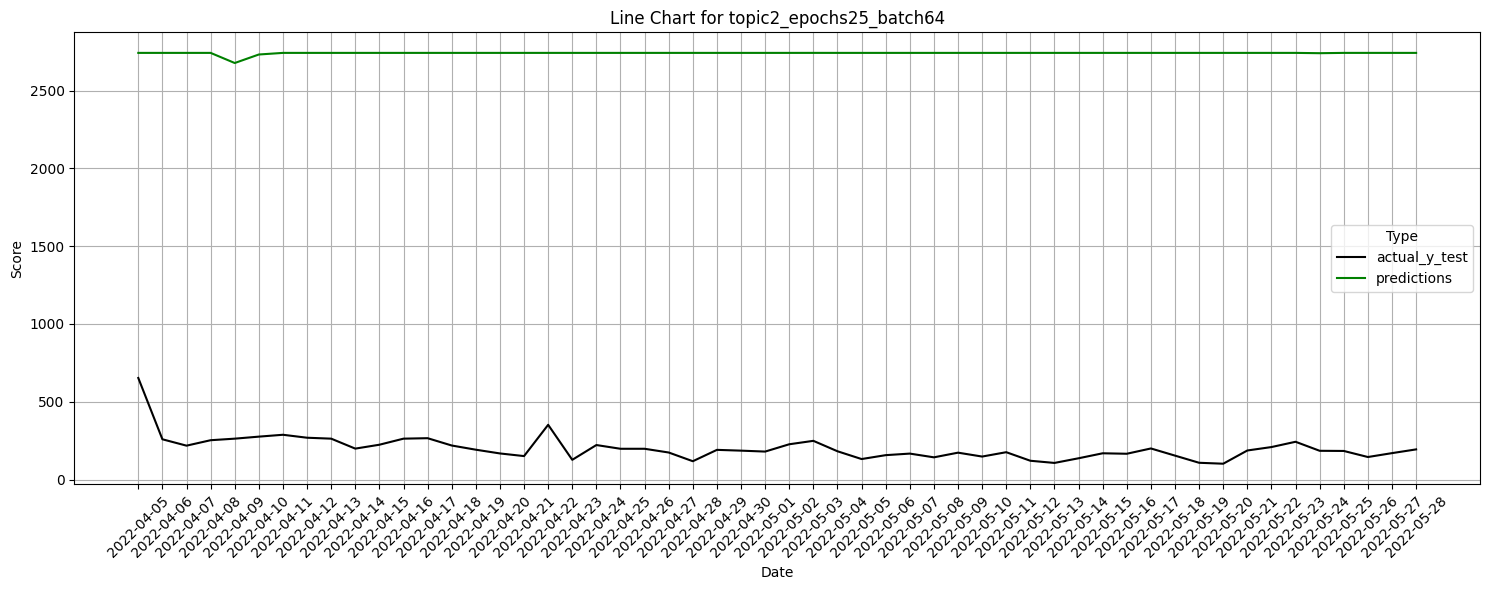

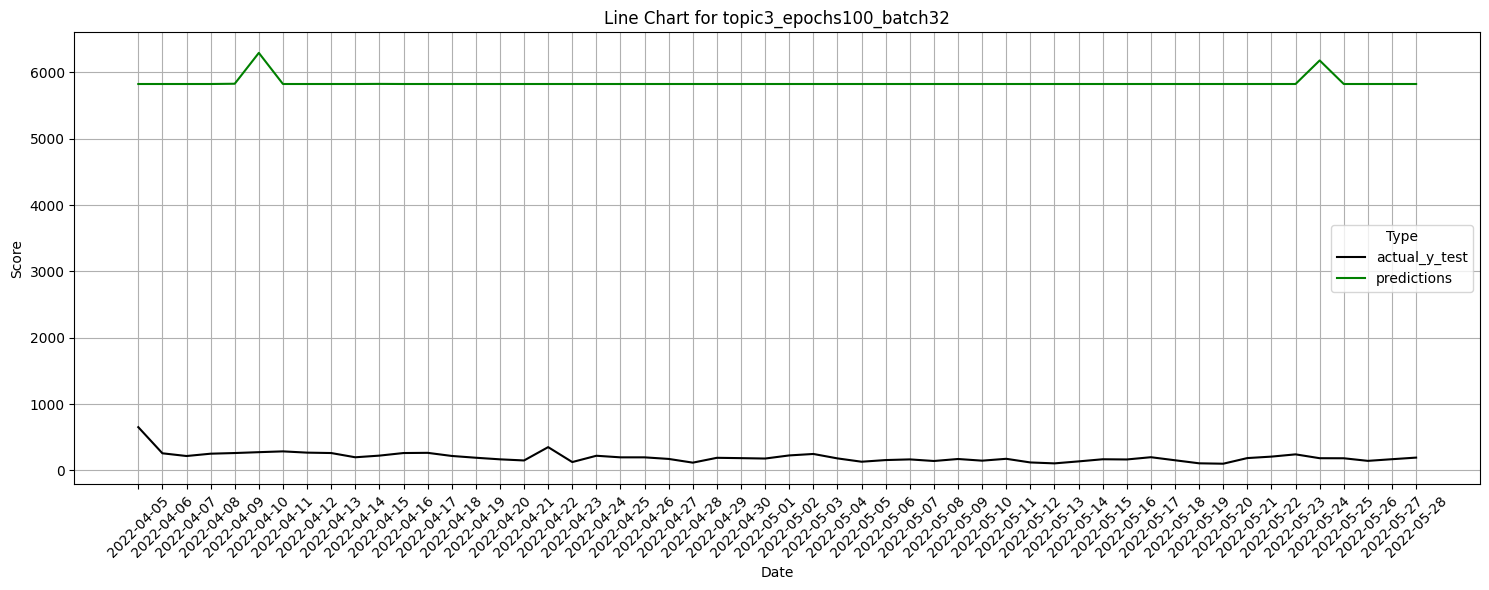

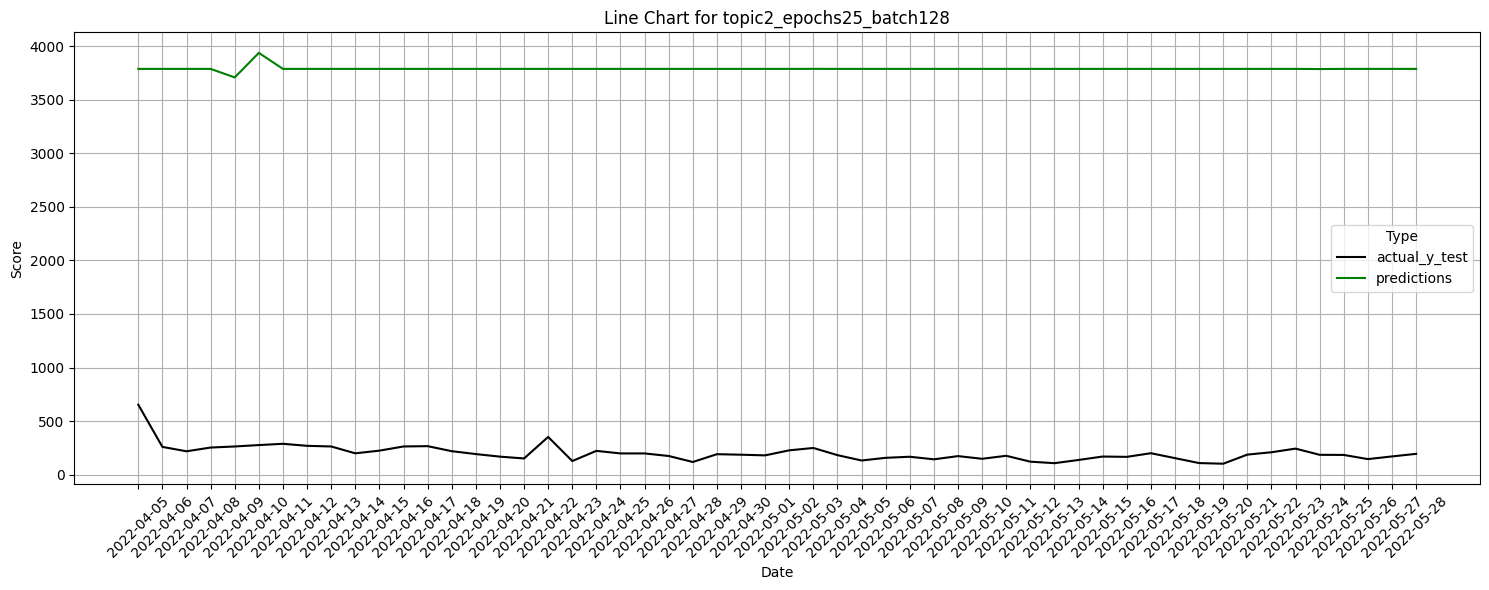

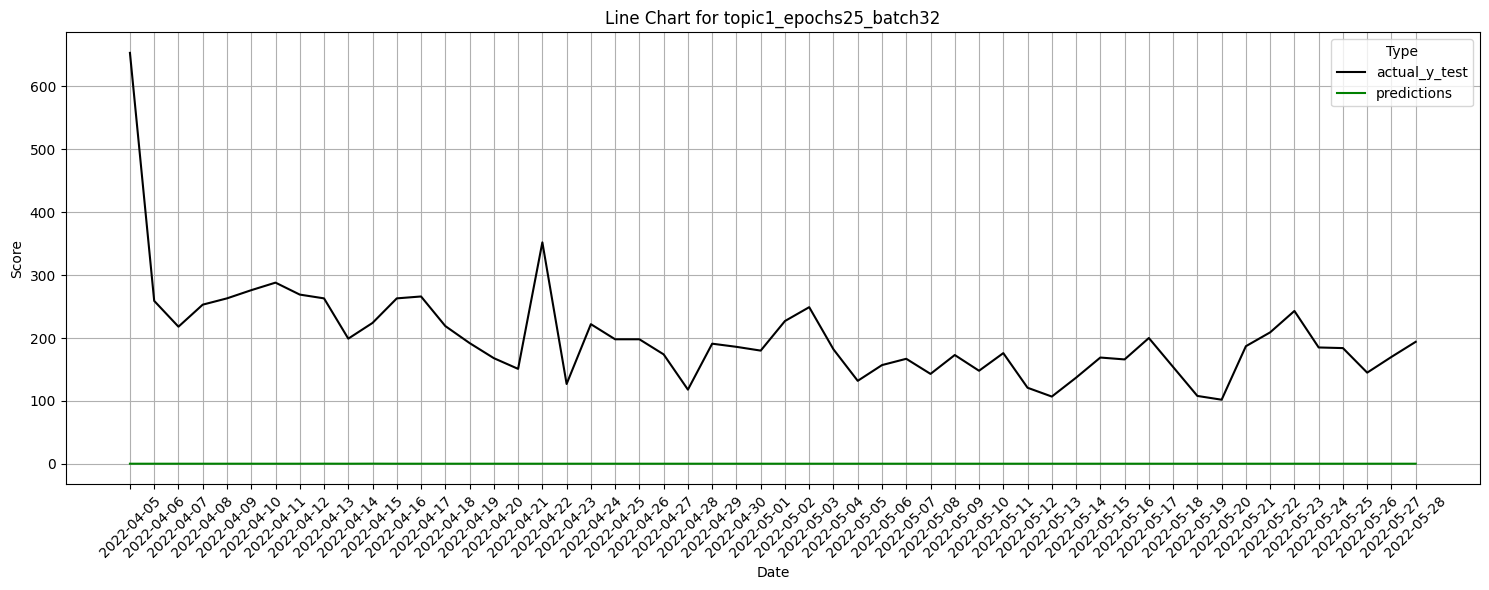

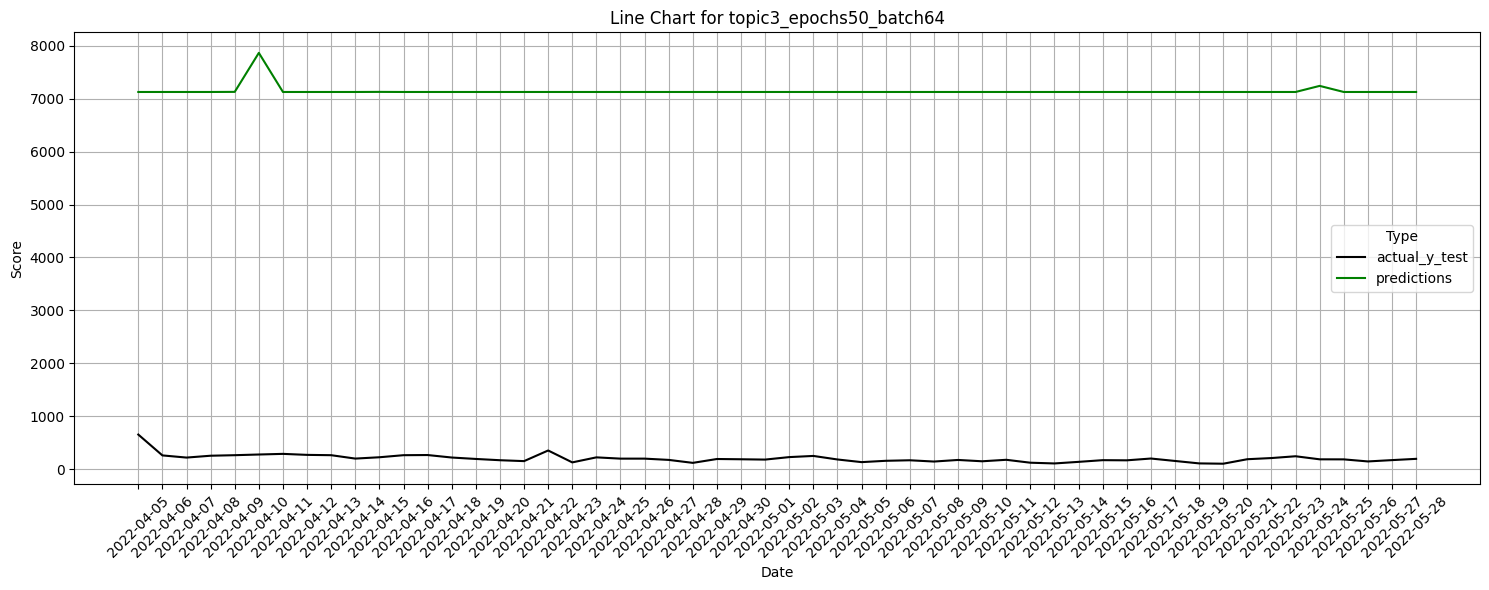

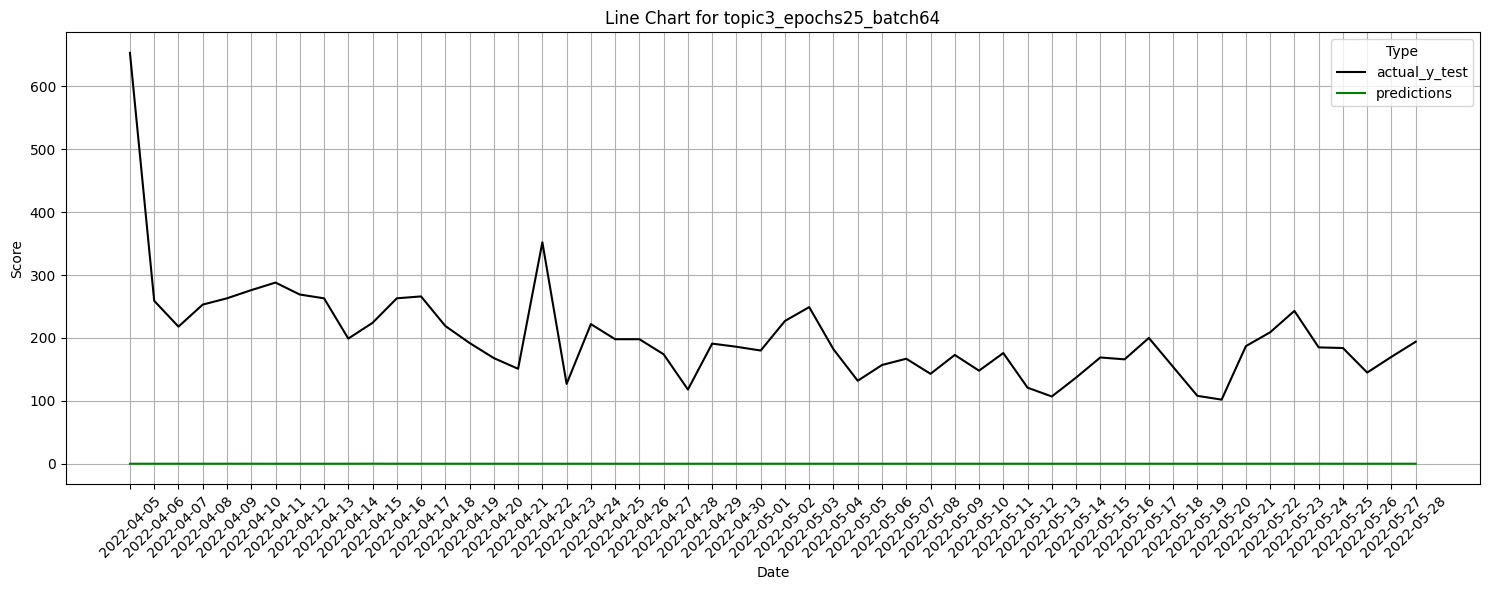

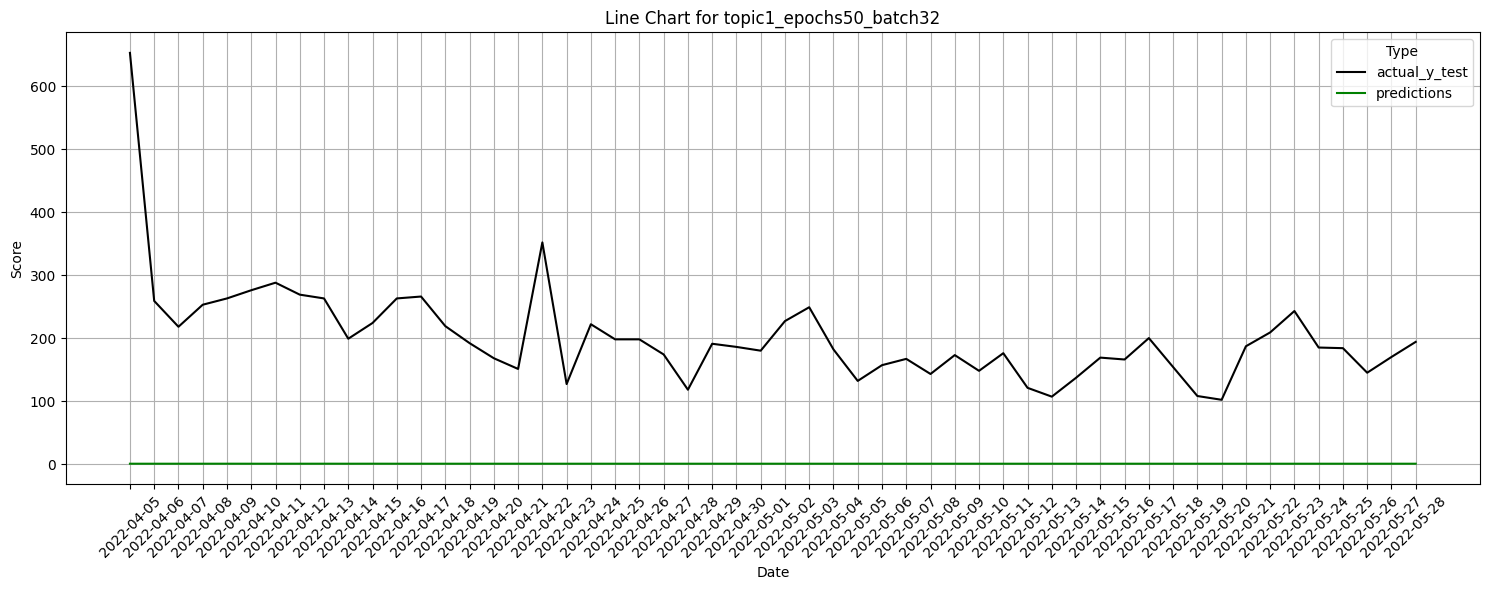

In [15]:
for df_name, df in model_dfs.items():
    df_long = pd.melt(
        df,
        id_vars='date',
        value_vars=['actual_y_test','predictions'],
        var_name='Type',
        value_name='Score'
    )

    cpallete = {
        'actual_y_test': 'black',
        'predictions': 'green'
    }

    plt.figure(figsize=(15,6))
    sns.lineplot(
        data=df_long,
        x='date',
        y='Score',
        hue='Type',
        palette=cpallete
    )

    plt.title(f'Line Chart for {df_name}')
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
rmse_dict = {}
for i, (model_name, df) in enumerate(model_dfs.items()):
    y_true = df['actual_y_test']
    y_pred = df['predictions']
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    rmse_dict[model_name] = rmse
    print(f"Model {model_name} RMSE: {rmse:.4f}")

Model topic2_epochs50_batch32 RMSE: 5309.8204
Model topic1_epochs100_batch64 RMSE: 5646.8122
Model topic2_epochs50_batch128 RMSE: 5320.6662
Model topic2_epochs100_batch32 RMSE: 6237.8809
Model topic3_epochs100_batch128 RMSE: 6378.9765
Model topic2_epochs25_batch32 RMSE: 5794.0197
Model topic3_epochs100_batch64 RMSE: 201.5892
Model topic1_epochs25_batch64 RMSE: 217.3865
Model topic2_epochs100_batch128 RMSE: 5952.2405
Model topic3_epochs25_batch128 RMSE: 216.8362
Model topic3_epochs50_batch32 RMSE: 90.7236
Model topic3_epochs25_batch32 RMSE: 217.1880
Model topic1_epochs100_batch128 RMSE: 5253.9933
Model topic1_epochs25_batch128 RMSE: 217.3943
Model topic1_epochs50_batch64 RMSE: 4736.7265
Model topic2_epochs50_batch64 RMSE: 6164.9333
Model topic3_epochs50_batch128 RMSE: 1111.3891
Model topic1_epochs100_batch32 RMSE: 4669.9848
Model topic1_epochs50_batch128 RMSE: 5243.6373
Model topic2_epochs100_batch64 RMSE: 5968.3622
Model topic2_epochs25_batch64 RMSE: 2540.0281
Model topic3_epochs100_ba